# Data Preparation

Dataset: <a href="https://raw.githubusercontent.com/Sketchjar/MachineLearningHD/main/wine_quality.csv">Wine Quality</a><br>
Filename: wine_quality.csv


## Import Libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [67]:
# Set Options for display
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [68]:
from scipy.stats import norm
from scipy import stats

________

# Part 2 - Data Quality Assessment

## Load the Dataset
* Specify the Parameters (Filepath, Index Column)
* Check for Date-Time Columns to Parse Dates
* Check Encoding if file does not load correctly

In [69]:
df = pd.read_csv("./wine_quality.csv")

View the Dataset

In [70]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winecolor
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,white
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,white
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,white
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white


Check the Shape

In [71]:
df.shape

(6497, 13)

Set the correct index

In [72]:
# df.set_index('Id', inplace=True)

## Ensure Columns / Features have Proper Labels

In [73]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'winecolor'],
      dtype='object')

In [74]:
correct_col_names = []

# REPLACING SPACE WITH _ FOR PROPER LABEL
for col_name in df.columns:
    splitted_name = col_name.split(' ')
    if len(splitted_name) == 1:
        correct_col_names.append(col_name)
    else:
        joined_name = '_'.join(splitted_name)
        correct_col_names.append(joined_name)

# REASSIGN COLUMN HEADERS
df.columns = correct_col_names

## Ensure Correct Format of Values

In [75]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
winecolor                object
dtype: object

## Remove Duplicates

Check if Index is duplicated

In [76]:
df.duplicated().sum()

1177

Check if there are duplicated rows


In [77]:
df[df.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,winecolor
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white
5,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,white
7,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,white
8,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,white
20,6.20,0.66,0.48,1.20,0.03,29.00,75.00,0.99,3.33,0.39,12.80,8,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,7.20,0.69,0.13,2.00,0.08,12.00,20.00,1.00,3.29,0.54,10.10,5,red
6462,7.20,0.69,0.13,2.00,0.08,12.00,20.00,1.00,3.29,0.54,10.10,5,red
6465,7.20,0.69,0.13,2.00,0.08,12.00,20.00,1.00,3.29,0.54,10.10,5,red
6479,6.20,0.56,0.09,1.70,0.05,24.00,32.00,0.99,3.54,0.60,11.30,5,red


Remove the duplicates if any

In [78]:
df.drop_duplicates(inplace=True)

## Handle Missing Data

Check for missing data

In [79]:
#Gets the total number of missing data
total = df.isnull().sum().sort_values(ascending=False)


In [80]:
#Get % of Null
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

In [81]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
fixed_acidity,0,0.00
volatile_acidity,0,0.00
citric_acid,0,0.00
residual_sugar,0,0.00
chlorides,0,0.00
free_sulfur_dioxide,0,0.00
total_sulfur_dioxide,0,0.00
density,0,0.00
pH,0,0.00
sulphates,0,0.00


In [82]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00,5320.00
mean,7.22,0.34,0.32,5.05,0.06,30.04,114.11,0.99,3.22,0.53,10.55,5.80
std,1.32,0.17,0.15,4.50,0.04,17.81,56.77,0.00,0.16,0.15,1.19,0.88
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.24,1.80,0.04,16.00,74.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.30,0.31,2.70,0.05,28.00,116.00,0.99,3.21,0.51,10.40,6.00
75%,7.70,0.41,0.40,7.50,0.07,41.00,153.25,1.00,3.33,0.60,11.40,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


In [83]:
df.shape

(5320, 13)

_______

# Part 3 - Exploratory Data Analysis

Get the statistics for numerical data

In [84]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,winecolor
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,white
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,white
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,white
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,white
6,6.20,0.32,0.16,7.00,0.04,30.00,136.00,0.99,3.18,0.47,9.60,6,white


In [85]:
#1 Age
df['quality'].value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

______

<AxesSubplot:>

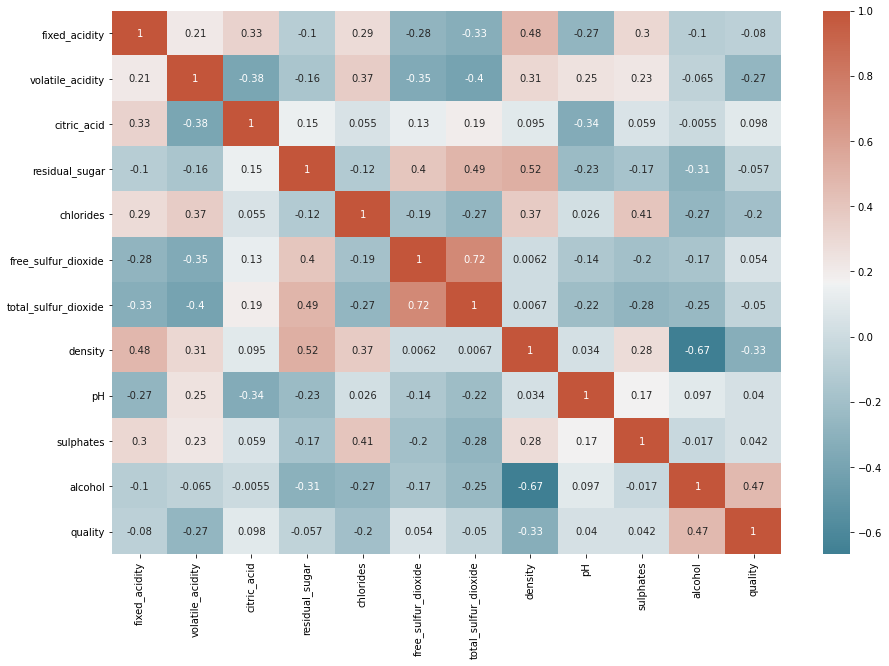

In [86]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

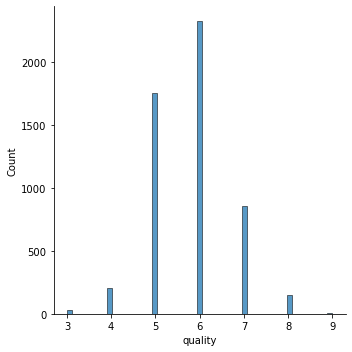

In [87]:
sns.displot(df['quality'])

<AxesSubplot:xlabel='quality'>

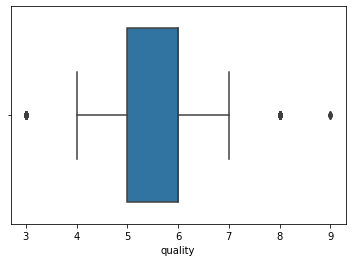

In [88]:
sns.boxplot(df['quality'])

In [98]:
# fig = plt.figure(figsize= [20, 10])
# cols = df.columns
# cnt = 1
# for col in cols:
#     plt.subplot(4,3,cnt)
#     sns.distplot(df[col],hist_kws=dict(edgecolor='k', linewidth=1, color='blue'), color='red')
#     cnt+=1
# plt.tight_layout()
# plt.show()

Text(0.5, 1.0, 'Wine Quality as explained by Fixed Acidity')

<Figure size 720x432 with 0 Axes>

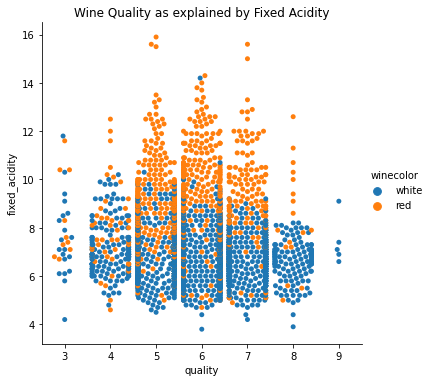

In [99]:
# get some idea of the data
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="fixed_acidity", hue="winecolor", kind="swarm", data=df)
plt.title("Wine Quality as explained by Fixed Acidity")

In [121]:
# Create Classification version of target variable
df['good_quality'] = [1 if x >= 7 else 0 for x in df['quality']]
df.good_quality.value_counts()

df['wine_color'] = [1 if color == 'white' else 0 for color in df['winecolor']]
df.wine_color.value_counts()

# Separate feature variables and target variable
X_quality = df.drop(['quality', 'good_quality', 'winecolor'], axis = 1)
y_quality = df['good_quality']


In [122]:
X_quality

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_color
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,1
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,1
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,1
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,1
6,6.20,0.32,0.16,7.00,0.04,30.00,136.00,0.99,3.18,0.47,9.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.80,0.62,0.08,1.90,0.07,28.00,38.00,1.00,3.42,0.82,9.50,0
6492,6.20,0.60,0.08,2.00,0.09,32.00,44.00,0.99,3.45,0.58,10.50,0
6493,5.90,0.55,0.10,2.20,0.06,39.00,51.00,1.00,3.52,0.76,11.20,0
6495,5.90,0.65,0.12,2.00,0.07,32.00,44.00,1.00,3.57,0.71,10.20,0


In [123]:
y_quality.value_counts()

0    4311
1    1009
Name: good_quality, dtype: int64

In [124]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X_quality
X = StandardScaler().fit_transform(X_quality)

In [125]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_quality, test_size=.25, random_state=0)

In [126]:
#decsion tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1083
           1       0.41      0.43      0.42       247

    accuracy                           0.78      1330
   macro avg       0.64      0.64      0.64      1330
weighted avg       0.78      0.78      0.78      1330



In [127]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1083
           1       0.64      0.32      0.43       247

    accuracy                           0.84      1330
   macro avg       0.75      0.64      0.67      1330
weighted avg       0.82      0.84      0.82      1330



In [128]:
print('Decision Tree')
print(classification_report(y_test, y_pred1))

print('---------------------------------------------------------------------------------')
print('Random Forest')
print(classification_report(y_test, y_pred2))

Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1083
           1       0.41      0.43      0.42       247

    accuracy                           0.78      1330
   macro avg       0.64      0.64      0.64      1330
weighted avg       0.78      0.78      0.78      1330

---------------------------------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1083
           1       0.64      0.32      0.43       247

    accuracy                           0.84      1330
   macro avg       0.75      0.64      0.67      1330
weighted avg       0.82      0.84      0.82      1330



_______

# Combine all the prepared dataframes

In [105]:
df_list = [df_num_scaled, df_cat, df_target]

df_final = pd.concat(df_list, axis = 1)

In [106]:
df_final.head()

,Age,Annual_Income,Spending_Score,Gender,Gender_num,Spending_Score
CustomerID,,,,,,
1,0.02,0.00,0.39,Male,1,39
2,0.06,0.00,0.82,Male,1,81
3,0.04,0.01,0.05,Female,2,6
4,0.10,0.01,0.78,Female,2,77
5,0.25,0.02,0.40,Female,2,40


In [108]:
df_final.columns

Index(['Age', 'Annual_Income', 'Spending_Score', 'Gender', 'Gender_num',
       'Spending_Score'],
      dtype='object')

In [109]:
df_final.shape

(200, 6)

## Save final DataFrame as a csv file

In [266]:
df_final.to_csv('./Output/c2_titanic_Output1.csv')

### Check if it loads correctly

In [267]:
df_check = pd.read_csv('./Output/c2_titanic_Output1.csv', index_col='PassengerId')

In [268]:
df_check.head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_num,Sex_num,Fare.1
PassengerId,,,,,,,,,,
0.00,0,0.00,1.00,0.27,0.12,0.00,0.01,2,2,7.25
0.00,1,1.00,0.00,0.47,0.12,0.00,0.14,3,3,71.28
0.00,2,1.00,1.00,0.32,0.00,0.00,0.02,2,3,7.92
0.00,3,1.00,0.00,0.43,0.12,0.00,0.10,2,3,53.10
0.00,4,0.00,1.00,0.43,0.00,0.00,0.02,2,2,8.05
